## Principal Component Analysis

In this notebook, PCA will be implemented both from scratch, and from sklearn.

Principal Component Analysis is a very popular dimensionallity reduction technique. PCA finds a hyperplane and projects the linear combination of variables on to that plane. The hyperplane axes are determined by the eigenvectors of the covariance matrix. When we project our data on to this plane we use the eigenvectors and multiply it by our scaled data. So the eigenvectors are the direction and the eigenvalues are the magnitude. The result of this is the principal components. We can think of the principal components as the coordinates and the eigenvectors as the coefficients of the new linear combination variables. 

The principal component with the largest variance captures most of the data. The magnitude is the amount of variance of the corresponding eigenvector. We always want to select the axes that preserve the most amount of variance. This axis also minimizes the mean squared distance between the original data and the projection on to the axis. 

 

In [63]:
# dependencies
import pandas as pd
import numpy as np
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [64]:
# create data
df = np.array([[3, 4], [2, 8], [6, 9]])
print(df)

[[3 4]
 [2 8]
 [6 9]]


In [65]:
# make data frame
df = pd.DataFrame(df, columns = ['Math', 'Science'])
df

,Math,Science
0,3,4
1,2,8
2,6,9


#### Center the data by mean

In [66]:
# transpose of the matrix to see how finding np.mean works
df.T

,0,1,2
Math,3,2,6
Science,4,8,9


In [67]:
# mean of each column, axis = 1 to work with rows ((4 + 8 + 9) / 2 = 7)
col_mean = np.mean(df.T, axis = 1)
# print the mean of each column
print(col_mean)
# subtract each value by the mean for mean centering
df_scaled = df - col_mean

Math       3.666667
Science    7.000000
dtype: float64


In [68]:
# mean centered data
print(df_scaled)

       Math  Science
0 -0.666667     -3.0
1 -1.666667      1.0
2  2.333333      2.0


In [69]:
# center the data frame using apply lambda
df_centered = df.apply(lambda x: x - x.mean())
df_centered

,Math,Science
0,-0.666667,-3.0
1,-1.666667,1.0
2,2.333333,2.0


#### Get Covariance Matrix

To find the covariance matrix, we have to use the transpose of our scaled data because np.cov assumes each row is a different variable.

In [70]:
# each row is a variable
df_centered.T

,0,1,2
Math,-0.666667,-1.666667,2.333333
Science,-3.000000,1.000000,2.000000


In [71]:
# covariance matrix - np.cov assumes each row is a variable
cov_matrix = np.cov(df_centered.T)
cov_matrix

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

#### Find the Eigenvalue and Eigenvectors for covariance matrix.

This code finds the eigenvalues and the eigenvectors. We get two eigenvalues and two eigenvectors for our data.

In [72]:
# find eigenvalue and eigenvector
eigval, eigvec = eig(cov_matrix)
eigval, eigvec

(array([2.83333333, 8.5       ]),
 array([[-0.85749293, -0.51449576],
        [ 0.51449576, -0.85749293]]))

In [73]:
print(f'Eigenvalues: {eigval}\n Eigenvectors: {eigvec}')

Eigenvalues: [2.83333333 8.5       ]
 Eigenvectors: [[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


#### Project our scaled data on to the new axes (eigvec)

Now that we have our eigenvectors we know the new axes. The eigenvalues are the magnitude for each eigenvector. The eigenvectors are the coefficients for the new linear combination variables and the magnitude tells us the amount of variance preserved by each. The next step is to project our data on to the axes by transposing the eigenvectors and multiplying it by our original scaled data. This means the eigenvectors are derived from the covariance of our data and the projection is done by multiplying that to our scaled data. 

In [74]:
eigvec.T

array([[-0.85749293,  0.51449576],
       [-0.51449576, -0.85749293]])

In [75]:
df_centered.T

,0,1,2
Math,-0.666667,-1.666667,2.333333
Science,-3.000000,1.000000,2.000000


In [76]:
# project scaled data on to eigenvectors (new axes)
projected = eigvec.T.dot(df_centered.T)
projected.T

array([[-9.71825316e-01,  2.91547595e+00],
       [ 1.94365063e+00,  1.11022302e-16],
       [-9.71825316e-01, -2.91547595e+00]])

In [77]:
# make them a dataframe
pca_df = pd.DataFrame(projected.T, columns = ['pc1', 'pc2'])
pca_df

,pc1,pc2
0,-0.971825,2.915476e+00
1,1.943651,1.110223e-16
2,-0.971825,-2.915476e+00


#### Using Sklearn

In this section, we implement the principal component analysis using the Scikit-Learn library. This library implements the centering of the data for us so we do not have to worry about that part. We see from the results that the same principal components are found with axes flipped.

In [78]:
# use sklearn
pca = PCA(n_components = 2)
pca_df_sklearn = pca.fit_transform(df)
pca_df_sklearn = pd.DataFrame(pca_df_sklearn, columns = ['pc1', 'pc2'])
pca_df_sklearn

,pc1,pc2
0,-2.915476e+00,0.971825
1,7.375885e-16,-1.943651
2,2.915476e+00,0.971825


In [79]:
# see if our eigenvectors are the same as those produced by sklearn
print(f'{pca.components_.T[:, 0:2]}\n\n{eigvec}')

[[ 0.51449576  0.85749293]
 [ 0.85749293 -0.51449576]]

[[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


##### Explained Variance Ratio

Since we are only using a simple two variable dataset, the two principal components will contain all 100% of the explained variance.

In [80]:
pca.explained_variance_ratio_

array([0.75, 0.25])

##### 3-D Dataset

In [112]:
# create dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [120]:
# center the data around the mean
x_centered = X -X.mean(axis=0)

# get eigenvectors using singular value decomposition with numpy
U, s, Vt = np.linalg.svd(x_centered)

# the transpose of Vt gives the principal components. 
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [121]:
# projecting on to the plane
# matrix containing the columns of V1
W2 = Vt.T[:, :2]
X2D = x_centered.dot(W2)

In [122]:
# using sklearn
pca = PCA(n_components= 2)
X2 = pca.fit_transform(X)



In [123]:
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [124]:
X2[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Below we can see how to calculate the explained variance using both SVD and sklearn. The values are the same. For sklearn, we only get two numbers because we chose 2 principal components. When we did SVD we have three because we had three variables in our data. These add up to 100 percent of the total variance. 

In [125]:
# s is equal to the variance of each principal component. 
# to find explained var we square it and divide by degrees of freedom
explained_var = (s ** 2) / x_centered.shape[0]

# total var
total_var = np.sum(explained_var)

# ratio
explained_variance_ratio = explained_var / total_var

explained_variance_ratio


array([0.84248607, 0.14631839, 0.01119554])

In [126]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [54]:
pca.shape

NameError: name 'pca' is not defined

Below is an example plot of original data along with the eigenvectors. We see that the eigenvectors from the covariance matrix are centered around the origin as well. The two eigenvectors are also orthogonal. The direction of the eigenvectors corresponds to the origin, not the original data. The original data will then be projected on to these eigenvectors using the magnitude. 

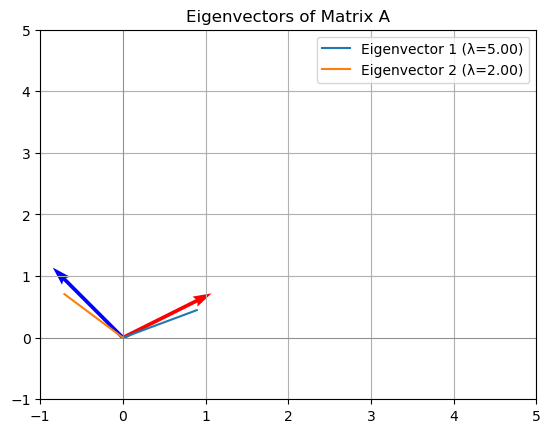

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# data matrix
A = np.array([[4, 2], [1, 3]])

# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# plot original data
origin = np.array([[0, 0], [0, 0]])  # origin point
plt.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['r', 'b'], scale=5)

# plot the eigenvectors
for i in range(len(eigenvalues)):
    plt.plot([0, eigenvectors[0, i]], [0, eigenvectors[1, i]], label=f'Eigenvector {i+1} (λ={eigenvalues[i]:.2f})')

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid()
plt.legend()
plt.title('Eigenvectors of Matrix A')
plt.show()


In [33]:
# transpose gives the eigenvectors
eigenvectors.T

array([[ 0.89442719,  0.4472136 ],
       [-0.70710678,  0.70710678]])

In [32]:
eigenvectors[:1]

array([[ 0.89442719, -0.70710678]])

In [34]:
eigenvalues

array([5., 2.])